In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [12]:
file_path = "Video_Games_Sales_as_at_22_Dec_2016.csv"  
encodings = ["utf-8", "latin1", "ISO-8859-1", "cp1252"]

for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print("Loaded with encoding:", enc)
        break
    except Exception as e:
        print(f"Failed with {enc}: {e}")

Loaded with encoding: utf-8


In [13]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [23]:
df.shape


(16719, 16)

In [16]:
df.describe(include='all').T
df.isnull().sum().sort_values(ascending=False).head(20)

User_Count         9129
Critic_Count       8582
Critic_Score       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Name                  2
Genre                 2
NA_Sales              0
Platform              0
JP_Sales              0
EU_Sales              0
Other_Sales           0
Global_Sales          0
dtype: int64

In [19]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

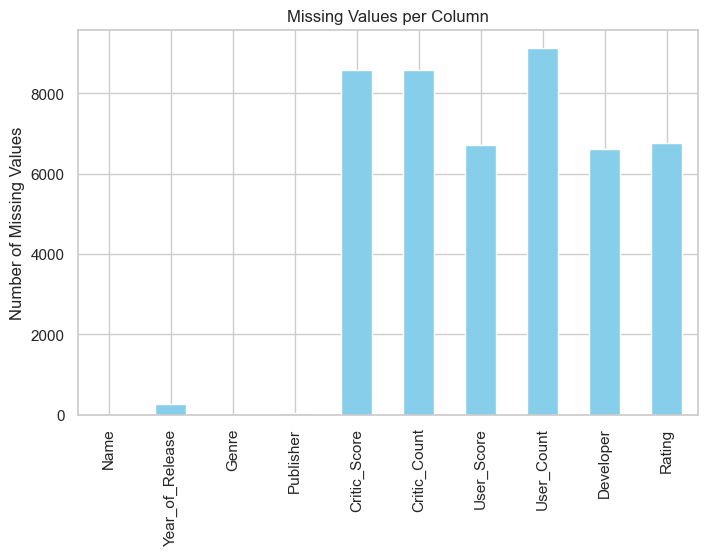

In [20]:
missing_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

In [15]:
df.drop(columns=['User_Count', 'Critic_Count', 'Rating', 'Developer'], inplace=True)


In [16]:
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

df['Critic_Score'].fillna(df['Critic_Score'].median(), inplace=True)
df['User_Score'].fillna(df['User_Score'].median(), inplace=True)

In [17]:
df.dropna(subset=['Year_of_Release'], inplace=True)
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [18]:
df['Publisher'].fillna('Unknown', inplace=True)


In [19]:
df.dropna(subset=['Name','Genre'], inplace=True)


In [20]:
df.reset_index(drop=True, inplace=True)


In [21]:
df.isnull().sum().sort_values(ascending=False)


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
User_Score         0
dtype: int64

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  int64  
 3   Genre            16448 non-null  object 
 4   Publisher        16448 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     16448 non-null  float64
 11  User_Score       16448 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
df.describe(include='all')


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [24]:
df.isnull().sum().sort_values(ascending=False)


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
User_Score         0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)


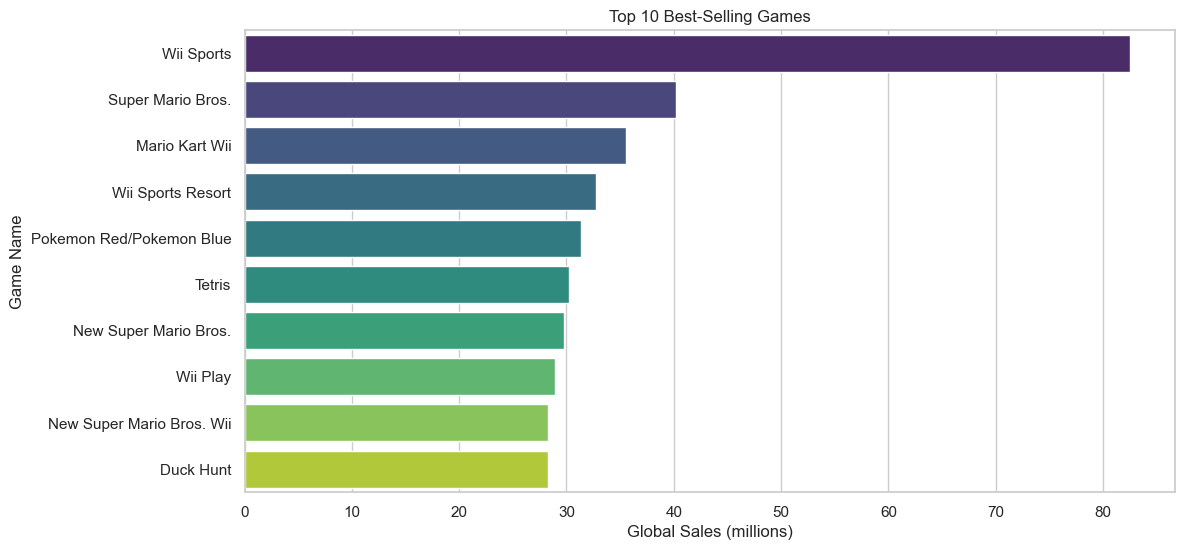

In [27]:
plt.figure(figsize=(12,6))  # make chart wider
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')

plt.xlabel("Global Sales (millions)")
plt.ylabel("Game Name")
plt.title("Top 10 Best-Selling Games")
plt.show()

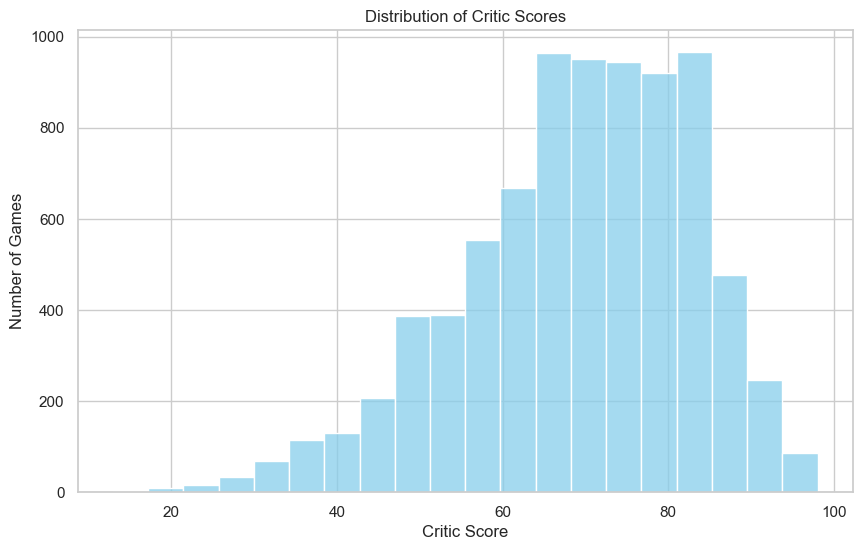

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Critic_Score'], bins=20, kde=False, color='skyblue')  
plt.title("Distribution of Critic Scores")
plt.xlabel("Critic Score")
plt.ylabel("Number of Games")
plt.show()

In [30]:
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


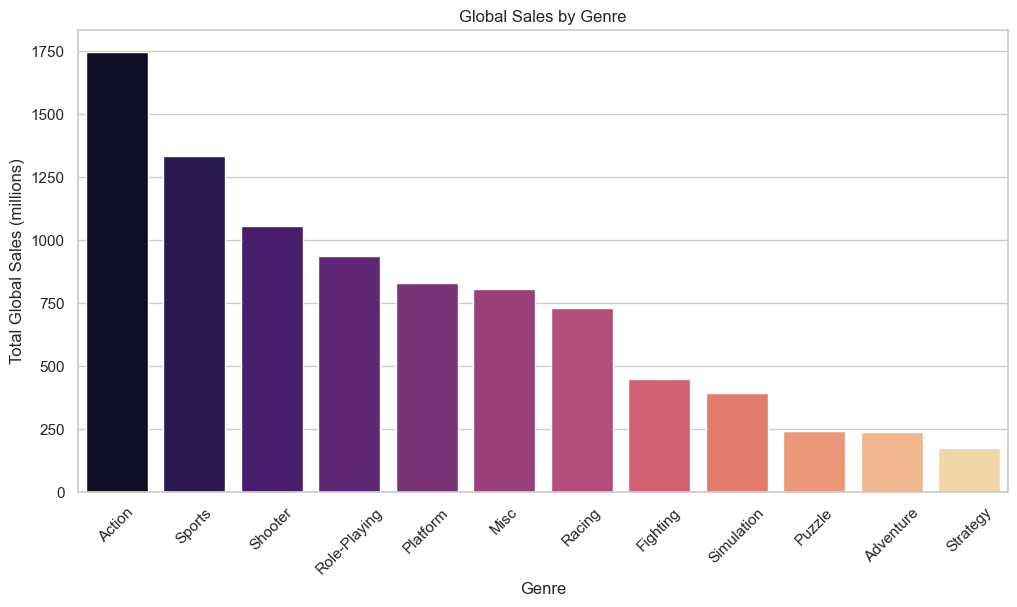

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values, palette='magma')
plt.xticks(rotation=45)  # rotate x labels for readability
plt.ylabel("Total Global Sales (millions)")
plt.xlabel("Genre")
plt.title("Global Sales by Genre")
plt.show()

In [32]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


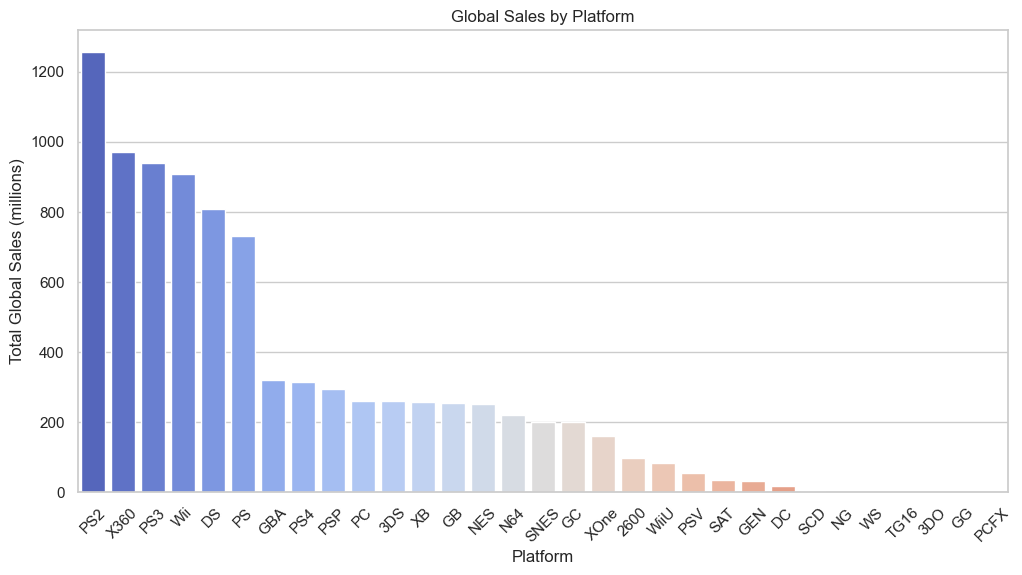

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='coolwarm')
plt.xticks(rotation=45)  # rotate x labels for readability
plt.ylabel("Total Global Sales (millions)")
plt.xlabel("Platform")
plt.title("Global Sales by Platform")
plt.show()

In [35]:
hit_threshold = 1.0  # million units
df['Hit'] = (df['Global_Sales'] > hit_threshold).astype(int)

In [36]:
print("Hit vs Flop counts:\n", df['Hit'].value_counts())


Hit vs Flop counts:
 Hit
0    14662
1     2057
Name: count, dtype: int64


In [ ]:
X = df[['Platform','Genre','Year_of_Release','Critic_Score','User_Score']].copy()
y = df['Hit']

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Platform','Genre']:
    X[col] = le.fit_transform(X[col].astype(str))

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))

Train size: (13158, 5) Test size: (3290, 5)
Train class balance:
 Hit
0    0.876349
1    0.123651
Name: proportion, dtype: float64


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Critic_Score','User_Score','Year_of_Release']] = scaler.fit_transform(
    X_train[['Critic_Score','User_Score','Year_of_Release']])
X_test[['Critic_Score','User_Score','Year_of_Release']] = scaler.transform(
    X_test[['Critic_Score','User_Score','Year_of_Release']])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
le = LabelEncoder()
for col in ['Platform', 'Genre']:
    X[col] = le.fit_transform(X[col].astype(str))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))

Train size: (13158, 5) Test size: (3290, 5)
Train class balance:
 Hit
0    0.876349
1    0.123651
Name: proportion, dtype: float64


In [41]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
y_pred = rf.predict(X_test)


In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8829787234042553


In [44]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2883
           1       0.55      0.29      0.38       407

    accuracy                           0.88      3290
   macro avg       0.73      0.63      0.66      3290
weighted avg       0.86      0.88      0.87      3290



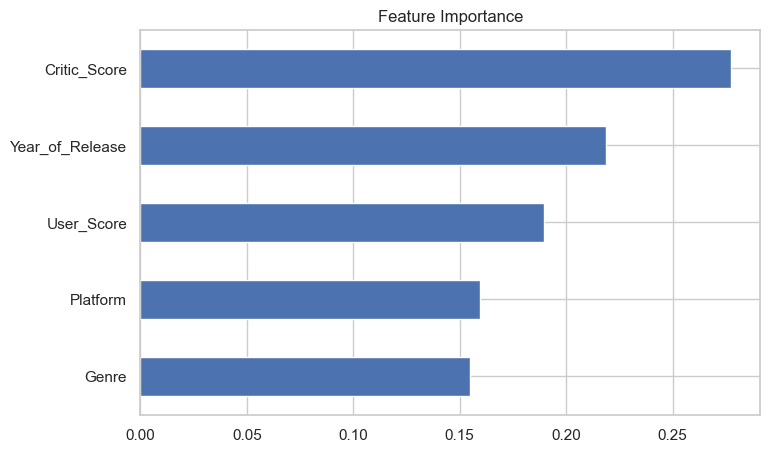

In [46]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [47]:
df['Predicted_Hit'] = rf.predict(X)


In [48]:
df['Predicted_Hit_Label'] = df['Predicted_Hit'].map({1: 'Hit', 0: 'Flop'})


In [49]:
df_results = df[['Name', 'Predicted_Hit_Label']]
df_results.head(20)  # display first 20 rows

,Name,Predicted_Hit_Label
0,Wii Sports,Hit
1,Super Mario Bros.,Flop
2,Mario Kart Wii,Hit
3,Wii Sports Resort,Hit
4,Pokemon Red/Pokemon Blue,Flop
5,Tetris,Hit
6,New Super Mario Bros.,Hit
7,Wii Play,Hit
8,New Super Mario Bros. Wii,Flop
9,Duck Hunt,Hit


In [50]:
df_results.to_csv("Video_Game_HitFlop_Predictions.csv", index=False)
